<a href="https://colab.research.google.com/github/HUYGIAHONGOC/Personal-Projects/blob/main/Airbnb_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd

In [ ]:
listings = pd.read_csv("Listings.csv", encoding = "ISO-8859-1", low_memory = False )

In [ ]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157143 entries, 0 to 157142
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   157143 non-null  int64  
 1   name                         157010 non-null  object 
 2   host_id                      157142 non-null  float64
 3   host_since                   157042 non-null  object 
 4   host_location                156653 non-null  object 
 5   host_response_time           84923 non-null   object 
 6   host_response_rate           84923 non-null   float64
 7   host_acceptance_rate         93098 non-null   float64
 8   host_is_superhost            157042 non-null  object 
 9   host_total_listings_count    157042 non-null  float64
 10  host_has_profile_pic         157042 non-null  object 
 11  host_identity_verified       157042 non-null  object 
 12  neighbourhood                157142 non-null  object 
 13 

In [ ]:
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157143 entries, 0 to 157142
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   157143 non-null  int64         
 1   name                         157010 non-null  object        
 2   host_id                      157142 non-null  float64       
 3   host_since                   157042 non-null  datetime64[ns]
 4   host_location                156653 non-null  object        
 5   host_response_time           84923 non-null   object        
 6   host_response_rate           84923 non-null   float64       
 7   host_acceptance_rate         93098 non-null   float64       
 8   host_is_superhost            157042 non-null  object        
 9   host_total_listings_count    157042 non-null  float64       
 10  host_has_profile_pic         157042 non-null  object        
 11  host_identity_verified    

In [ ]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37104 entries, 0 to 156951
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     37087 non-null  datetime64[ns]
 1   neighbourhood  37104 non-null  object        
 2   city           37104 non-null  object        
 3   accommodates   37104 non-null  float64       
 4   price          37104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
paris_listings.isna().sum()

host_since       17
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [ ]:
paris_listings.describe()

,host_since,accommodates,price
count,37087,37104.000000,37104.000000
mean,2016-01-10 03:03:55.586593792,3.122790,118.349962
min,2008-09-09 00:00:00,0.000000,0.000000
25%,2014-04-29 00:00:00,2.000000,60.000000
50%,2015-08-04 00:00:00,2.000000,81.000000
75%,2017-10-22 00:00:00,4.000000,120.000000
max,2021-02-06 00:00:00,16.000000,12000.000000
std,NaN,1.640299,227.952812


In [ ]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       1
neighbourhood    1
city             1
accommodates     1
price            1
dtype: int64

In [ ]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
  )
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,158.346526
Passy,161.803675
Palais-Bourbon,165.320074
Louvre,185.756532
Elysee,219.791342


In [ ]:
paris_listings_acccommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean", "neighbourhood": "count"})
    .sort_values("price")
    )
paris_listings_acccommodates.head()

,price,neighbourhood
accommodates,,
1.0,90.403846,52
2.0,160.315335,463
3.0,162.347368,95
4.0,217.093023,301
5.0,299.092593,54


In [ ]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
         })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,1,125.000000
2009-12-31,43,229.930233
2010-12-31,182,130.824176
2011-12-31,560,110.512500
2012-12-31,2102,108.990010


<Axes: title={'center': 'Average Listing Price by Accommodation Nummber'}, xlabel='Price Per Night(Euros)', ylabel='Accommodation Capacity'>

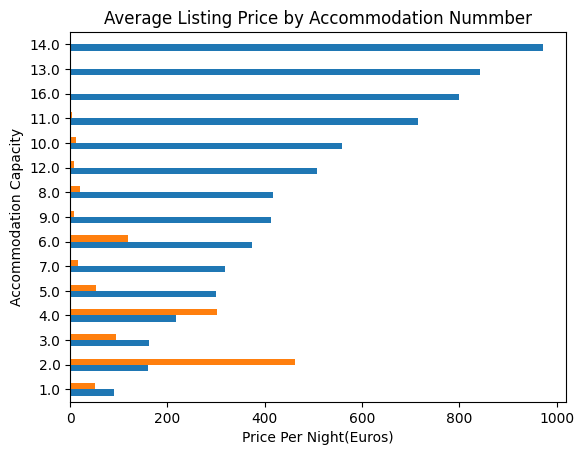

In [ ]:
(paris_listings_acccommodates
    .plot
    .barh(
     title="Average Listing Price by Accommodation Nummber",
     xlabel="Price Per Night(Euros)",
     ylabel="Accommodation Capacity",
     legend=None
 )
 )


<Axes: title={'center': 'New Airbnb Host in Paris Over Time'}, xlabel='host_since', ylabel='New Hosts'>

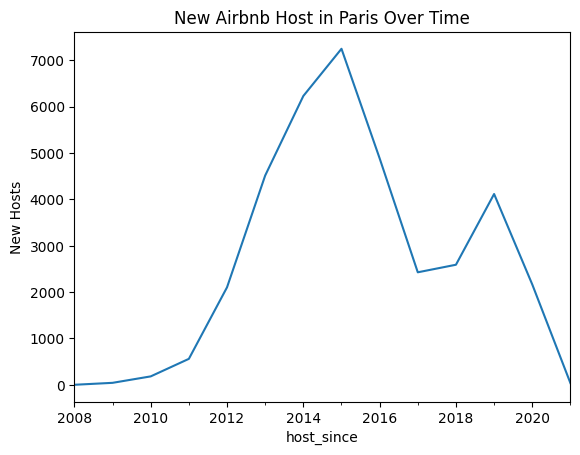

In [ ]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New Airbnb Host in Paris Over Time"
)

<Axes: title={'center': 'Average AirBnB Price in Paris Over Time'}, xlabel='host_since', ylabel='Average Price(Euros)'>

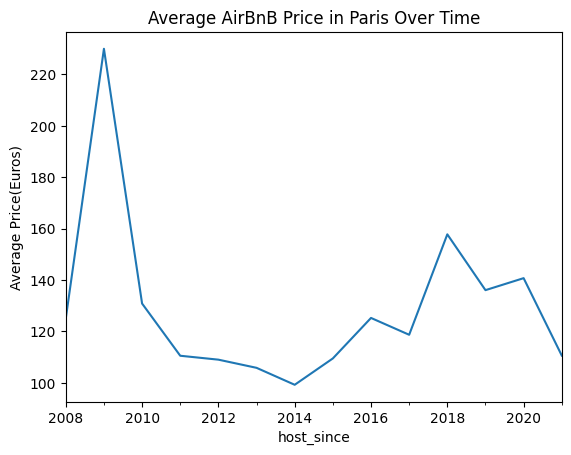

In [ ]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price(Euros)",
    title="Average AirBnB Price in Paris Over Time"
)

Text(0.5, 1.0, '2015 Regulation Lead to Fewer New Hosts, Higher Prices')

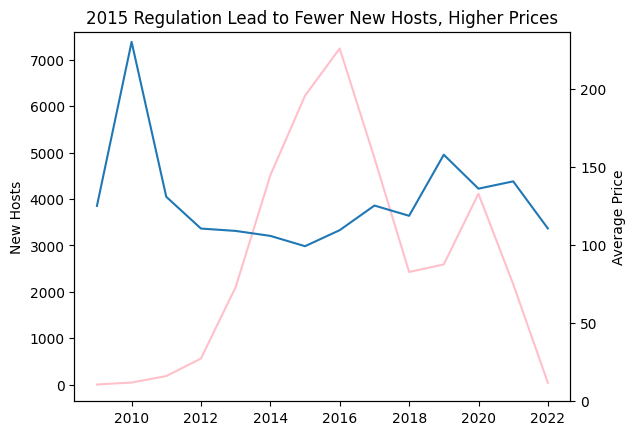

In [ ]:
import matplotlib.pyplot as  plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulation Lead to Fewer New Hosts, Higher Prices")